Baseline Accuracy: 0.9814814814814815
Baseline Precision: 0.9777777777777779
Baseline Recall: 0.9841269841269842

PCA with 2 Components:
Accuracy: 0.9629629629629629
Precision: 0.9710144927536232
Recall: 0.9649122807017544

PCA with 5 Components:
Accuracy: 0.9629629629629629
Precision: 0.9595238095238096
Recall: 0.9603174603174603

PCA with 10 Components:
Accuracy: 0.9814814814814815
Precision: 0.9777777777777779
Recall: 0.9841269841269842


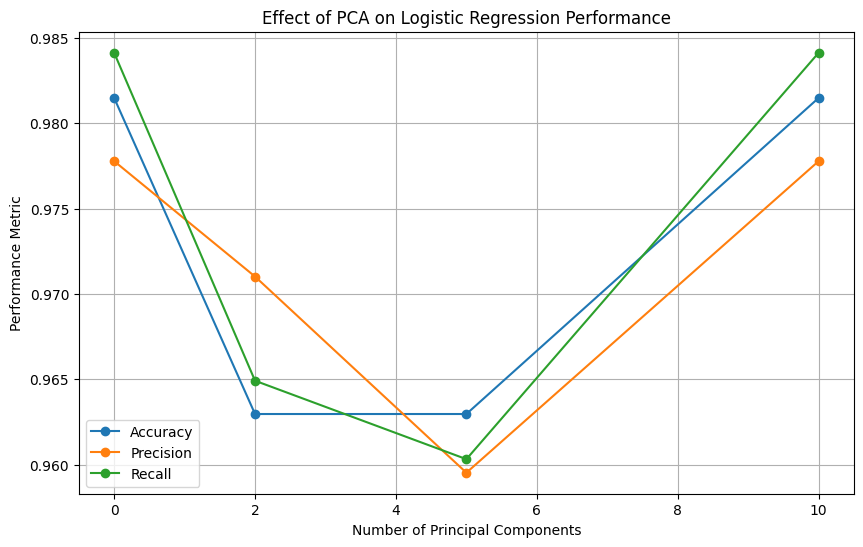

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data = load_wine()
features = data.data
labels = data.target

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
pred_baseline = logistic_model.predict(X_test)

accuracy_initial = accuracy_score(y_test, pred_baseline)
precision_initial = precision_score(y_test, pred_baseline, average='macro')
recall_initial = recall_score(y_test, pred_baseline, average='macro')

print(f"Baseline Accuracy: {accuracy_initial}")
print(f"Baseline Precision: {precision_initial}")
print(f"Baseline Recall: {recall_initial}")

pca_components = [2, 5, 10]
acc_list = []
prec_list = []
recall_list = []

for n_comps in pca_components:
    pca_model = PCA(n_components=n_comps)
    X_train_pca = pca_model.fit_transform(X_train)
    X_test_pca = pca_model.transform(X_test)

    logistic_pca = LogisticRegression()
    logistic_pca.fit(X_train_pca, y_train)
    y_pca_pred = logistic_pca.predict(X_test_pca)

    accuracy_pca = accuracy_score(y_test, y_pca_pred)
    precision_pca = precision_score(y_test, y_pca_pred, average='macro')
    recall_pca = recall_score(y_test, y_pca_pred, average='macro')

    acc_list.append(accuracy_pca)
    prec_list.append(precision_pca)
    recall_list.append(recall_pca)

    print(f"\nPCA with {n_comps} Components:")
    print(f"Accuracy: {accuracy_pca}")
    print(f"Precision: {precision_pca}")
    print(f"Recall: {recall_pca}")

plt.figure(figsize=(10, 6))
plt.plot([0] + pca_components, [accuracy_initial] + acc_list, label='Accuracy', marker='o')
plt.plot([0] + pca_components, [precision_initial] + prec_list, label='Precision', marker='o')
plt.plot([0] + pca_components, [recall_initial] + recall_list, label='Recall', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Performance Metric')
plt.title('Effect of PCA on Logistic Regression Performance')
plt.legend()
plt.grid()
plt.show()
